## Does Height Matter for Distance Running? 
### By Samuel Kellum

___

<h5> Background </h5>
<p>Height is very important in sports like basketball and most positions in football, where athletes are rarely shorter than 6 feet tall at the professional and NCAA Division I level. On the other hand, shorter athletes have an advantage in sports like gymnastics or equestrian.</p>
<p>Distance running has always been viewed as a sport where height does not matter. The heights of different world class runnners in the same event varies a lot. For example, Kenenisa Bekele, former world record holder in the 10,000m, stands at 5'3. On the other hand, Chris Solinsky, fromer American record holder in the 10,000m, is 6'1.</p>
<p>As a Division I runner, I became interested in exploring heights of athletes on Division I cross-country teams after one of my teammates noticed that the people on other teams seem to be significantly taller than us. Many of these teams were also a lot better than my team. This sequence of observations gave me two questions:</p><br>
    <li>Is there an association between the average height of a team's runners and team success?</li>
    <li>How does my team (Tulane) compare to other teams in terms of average height?</li>
    <p>In this analysis I will attempt to answer the above questions.</p>
    
___


<h5>Data Extraction, Transform and Load </h5>

For this analysis, I will will be using Python 3, Pandas, MatPlotLib, and more. The first code cell will be importing the necessary libraries.

In [1]:
## Importing and loading everythng we will need to use.
# Load requests
import requests
# Load BeautiulSoup
from bs4 import BeautifulSoup
# Load Regular Expression Library
import re
# Load Google Search
from googlesearch import search

# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

# Load Pandas
import pandas as pd

In this analysis, the first thing I needed was a list and rank of every Division 1 cross country team. I decided to use data from <a href='https://www.lacctic.com/leagues/4'>LACCTiC.com</a>, a website that ranks every Division 1 cross-country team that has at least five runners (the minimum required to score as a team). The data in this website is extracted from <a href='https://www.tfrrs.org/'>TFRRS</a>, which is a website that compiles all NCAA cross county meet results. 

In [2]:
heights = pd.read_excel('Heights.xlsx')
heights.head()

,rank,team,heights,url,notes
0,1,Northern Arizona,No,NaN,NaN
1,2,BYU,Yes,https://byucougars.com/roster/m-cross-country,NaN
2,3,Oklahoma State,No,NaN,NaN
3,4,Notre Dame,No,NaN,NaN
4,5,Iowa State,No,NaN,NaN


In [3]:
teams = heights['team'].tolist()

In [4]:
for i in range(3):
    for j in search(teams[i] + 'mens cross country roster', tld="com", num=1, stop=1, pause=0.5):
        print(j)

https://nauathletics.com/sports/cross-country/roster
http://byucougars.com/roster/m-cross-country
https://okstate.com/sports/mxct/roster/2021-22


In [5]:
all_urls = heights['url'].tolist()
#Removing NaN urls (urls for teams that don't have heights)
urls = [str(i) for i in all_urls if str(i) != 'nan']

In [6]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
gets = []
for i in range(len(urls)):
    gets.append(requests.get(urls[i], headers=headers))

In [7]:
prettys = []
for i in range(len(urls)):
    prettys.append((BeautifulSoup(gets[i].content, 'html.parser')).prettify())

In [8]:
results = []
for i in range(20):
    results.append(re.findall('''[456][-]\d{1,2}\n''', prettys[i]))
#ETSU
results.append(re.findall("[456][']\d{1,2}", prettys[20]))
for i in range(21, 31):
    results.append(re.findall('''[456][-]\d{1,2}\n''', prettys[i]))
#Kansas
results.append(re.findall("[456][\']\d{1,2}", prettys[31]))
for i in range(32, 44):
    results.append(re.findall('''[456][-]\d{1,2}\n''', prettys[i]))
#Baylor
results.append(re.findall('''\"height_feet":\d,"height_inches":\d{1,2}''', prettys[44]))
for i in range(45, len(prettys)):
    results.append(re.findall('''[456][-]\d{1,2}\n''', prettys[i]))

In [9]:
## Slicing index to remove women or non-distance runners from each roster that combines genders or all track athletes
results[1] = results[1][24:]

results[2] = results[2][3:]

results[3] = results[3][27:32] +  results[3][33:38] + results[3][39:46] + results[3][47:51]

results[4] = results[4][:26]

results[5] = results[5][12:]

results[7] = results[7][15:]

results[8] = results[8][23:]

results[9] = results[9][23:]

results[10] = results[10][:29] + results[10][34:45] + results[10][72:]

results[14] = results[14][26:]

results[17] = results[17][2:]

results[19] = results[19][14:]

for i in range(len(results[20])):
    results[20][i] = results[20][i].replace("'","-")
    
results[22] = results[22][16:]

results[27] = results[27][23:]

results[29] = results[29][:10]

results[30] = results[30][21:]

results[31] = results[31][:19]
for i in range(len(results[31])):
    results[31][i] = results[31][i].replace("'","-")

results[32] = results[32][7:]

results[33] = results[33][:11]

results[34] = results[34][:11]

results[35] = results[35][3:14]

results[36] = results[36][15:]

results[39] = results[39][3:]

results[44] = sorted(results[44])
results[44] = results[44][::2]
results[44] = results[44][21:22] + results[44][29:31] + results[44][4:6] + results[44][31:] 
for i in range (len(results[44])):
    results[44][i] = re.split(':|,',results[44][i])
    results[44][i] = results[44][i][1] + "-" + results[44][i][3]

results[45] = results[45][18:]

results[49] = results[49][13:]

results[51] = results[51][23:]

results[55] = results[55][7:]

results[58] = results[58][6:]

results[59] = results[59][11:]

results[60] = results[60][7:]

results[62] = results[62][3:]

results[63] = results[63][10:]

results[67] = results[67][:18]

results[68] = results[68][38:41] + results[68][42:]

results[70] = results[70][23:24] + results[70][25:26] + results[70][34:35]

results[71] = results[71][10:]

results[71] = results[71][10:]

results[74] = results[74][10:]

results[83] = results[83][1:]

results[84] = results[84][10:]

results[85] = results[85][6:]

results[86] = results[86][:10]

In [10]:
heights_column = []
for i in range(len(results)):
    for element in range (len(results[i])):
        heights_column.append(results[i][element].strip())

In [11]:
yes = heights[heights['heights'] == 'Yes']
no = heights[heights['heights'] == 'No']

In [12]:
yes['rank'].mean() , no['rank'].mean()

(183.32978723404256, 150.25333333333333)

In [13]:
yes_teams = yes['team'].tolist()
yes_rank = yes['rank'].tolist()

In [14]:
team_association = []
team_rank = []
for i in range(len(yes_teams)):
    for j in range(len(results[i])):
        team_association.append(yes_teams[i])
        team_rank.append(yes_rank[i])

In [15]:
df = pd.DataFrame({'heights': heights_column, 'teams': team_association, 'team_rank': team_rank})


In [16]:
df['inches'] = (df['heights'].astype(str).str[0].astype(int) * 12) + (df['heights'].astype(str).str[2:].astype(int)) 

In [17]:
atleast5 = df[df.groupby(['teams','team_rank'])['inches'].transform('size') >= 5]

In [18]:
average_df = pd.DataFrame(atleast5.groupby(['teams','team_rank'])['inches'].mean().sort_values())

In [19]:
atleast5

,heights,teams,team_rank,inches
0,5-11,BYU,2,71
1,5-10,BYU,2,70
2,6-1,BYU,2,73
3,6-0,BYU,2,72
4,5-9,BYU,2,69
...,...,...,...,...
1214,6-1,Mississippi Valley,316,73
1215,5-9,Mississippi Valley,316,69
1216,5-5,Mississippi Valley,316,65
1217,5-10,Mississippi Valley,316,70


In [20]:
pd.set_option('display.max_rows', 100)
average_df = average_df.reset_index()
average_df

,teams,team_rank,inches
0,Tulane,268,68.625000
1,St. Mary's (Cal.),117,68.642857
2,Houston,235,68.666667
3,Presbyterian,310,68.666667
4,Houston Baptist,226,68.777778
5,Arkansas-Pine Bluff,291,68.833333
6,Tennessee Tech,158,69.000000
7,Mississippi Valley,316,69.000000
8,UNCW,285,69.000000
9,Sam Houston St.,174,69.153846


In [21]:
average_df['inches'].describe()

count    81.000000
mean     70.311855
std       0.841794
min      68.625000
25%      69.886364
50%      70.333333
75%      70.809524
max      72.400000
Name: inches, dtype: float64

In [22]:
any_size = df.groupby(['teams','team_rank'])['inches'].mean().sort_values()
any_size

teams                team_rank
Hampton              313          68.000000
Tulane               268          68.625000
St. Mary's (Cal.)    117          68.642857
Presbyterian         310          68.666667
Houston              235          68.666667
Houston Baptist      226          68.777778
Arkansas-Pine Bluff  291          68.833333
Mississippi Valley   316          69.000000
UNCW                 285          69.000000
Tennessee Tech       158          69.000000
Sam Houston St.      174          69.153846
Idaho State          169          69.200000
Austin Peay          295          69.250000
Incarnate Word       162          69.333333
St. Peter's          306          69.500000
Fairleigh Dickinson  309          69.500000
Nevada               106          69.500000
Oral Roberts         304          69.555556
Florida Atlantic     294          69.625000
Cal Poly             77           69.645161
UC Irvine            188          69.666667
Texas Southern       283          69.750000
U

In [23]:
average_df.corr()

,team_rank,inches
team_rank,1.000000,-0.193037
inches,-0.193037,1.000000


<AxesSubplot:xlabel='inches', ylabel='team_rank'>

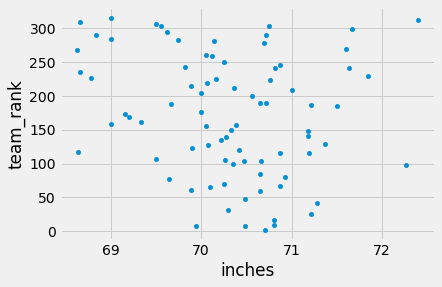

In [24]:
average_df.plot.scatter('inches','team_rank')

In [58]:
pd.options.display.max_rows = 500
df.loc[df['inches'] == 74]

,heights,teams,team_rank,inches
23,6-2,BYU,2,74
38,6-2,Colorado,7,74
71,6-2,Tulsa,9,74
79,6-2,Tulsa,9,74
93,6-2,Air Force,16,74
110,6-2,Air Force,16,74
111,6-2,Air Force,16,74
122,6-2,Furman,25,74
127,6-2,Furman,25,74
172,6-2,Duke,42,74
